# Credit Card Fraud Detection

****

A dataset taken from Kaggle with the intention of analysing, and later do some prediction on unseen data, on the conspicuous **fraud detection dataset**, a problem statement acquiring top spot in the list of used cases by the Banking and Finance industries that are being taken care off with the help of **Data Science and Machine Learning**.

The dataset we have, is of 2 days and contain 31 variables incuding our target variable **(class)**. Out of all the other variables, only **time** and **amount** columns are available to us, rest all are compressed using PCA so they are not directly consumable for any information or insights retrieval. 

In [1]:
#basic Data processing and visualization packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#feature processing and re-sampling packages
from sklearn.decomposition import PCA 
from collections import Counter # counter takes values and return value_counts dictionary
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#metrics for the model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

#ML model packages
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [4]:
#importing the dataset
batsy = pd.read_csv("C:/Users/Mr_Robot/Documents/Data_Science/Python/012_CAPSTONE_PROJECT/03CreditCard/Dataset/creditcard.csv")
batsy 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
batsy.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
#converting the column names into lowercase to avoid confusion
batsy.columns = batsy.columns.str.lower()

In [7]:
#checkin the classes of the target variable
batsy["class"].value_counts(normalize = True)*100

0    99.827251
1     0.172749
Name: class, dtype: float64

In [8]:
batsy[["amount", "time", "class"]].describe()

,amount,time,class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


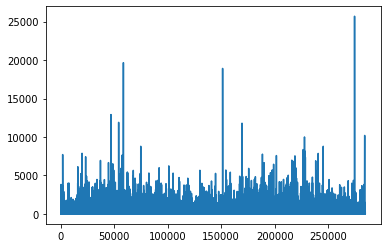

In [9]:
plt.plot(batsy["amount"])
plt.show()

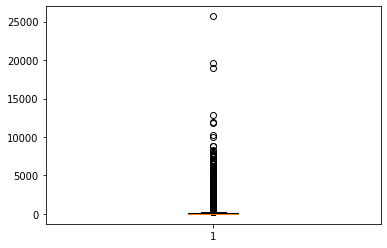

In [10]:
plt.boxplot(batsy["amount"])
plt.show()

In [11]:
batsy = batsy.drop(batsy[batsy["amount"] > 8000].index.values[0])

In [12]:
batsy.reset_index(drop = True, inplace = True)

In [13]:
batsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284806 non-null  float64
 1   v1      284806 non-null  float64
 2   v2      284806 non-null  float64
 3   v3      284806 non-null  float64
 4   v4      284806 non-null  float64
 5   v5      284806 non-null  float64
 6   v6      284806 non-null  float64
 7   v7      284806 non-null  float64
 8   v8      284806 non-null  float64
 9   v9      284806 non-null  float64
 10  v10     284806 non-null  float64
 11  v11     284806 non-null  float64
 12  v12     284806 non-null  float64
 13  v13     284806 non-null  float64
 14  v14     284806 non-null  float64
 15  v15     284806 non-null  float64
 16  v16     284806 non-null  float64
 17  v17     284806 non-null  float64
 18  v18     284806 non-null  float64
 19  v19     284806 non-null  float64
 20  v20     284806 non-null  float64
 21  v21     28

#### Some basic inferences about the data -
- Our dataset has **284807 rows × 31 columns**.
- Only **3 columns** are available, other columns are PCA reduced.
- The target variable - **class**, has highly imbalanced classes to the ratio of: **0: 99.827% | 1: 0.172%**, which is justifiable as frauds doesn't happen all the time but legit transactions does.
- **amount** variable has alot of outliers, which has been taken care of.
- **time** variable values are in seconds.
- Fortunately, there are no categorical variables in the dataset which requires separate attention and treatment.

In [ ]:
#outlier detection and removal
#def indices_of_outliers(x):
    #q1, q3 = np.percentile(x, [25, 75])
    #iqr = q3 - q1
    #lower_bound = q1 - (iqr * 1.5)
    #upper_bound = q3 + (iqr * 1.5)
    #return np.where((x > upper_bound) | (x < lower_bound))

In [ ]:
#indices_of_outliers(batsy["Amount"])

In [ ]:
#list(indices_of_outliers(batsy["Amount"])[0])

In [ ]:
#batsy[batsy.index.isin(list(indices_of_outliers(batsy["Amount"])[0]))]

In [ ]:
#len(batsy[batsy.index.isin(list(indices_of_outliers(batsy["Amount"])[0]))])/len(batsy)*100

In [ ]:
#batsy[batsy.index.isin(list(indices_of_outliers(batsy["Amount"])[0]))]["Class"].value_counts(normalize = True)*100

In [ ]:
#temp = len(batsy) - len(batsy[batsy.index.isin(list(indices_of_outliers(batsy["Amount"])[0]))])
#temp

In [ ]:
#batsy = batsy.drop(list(indices_of_outliers(batsy["Amount"])[0]))
#batsy.reset_index(drop = True, inplace = True)

## Exploratory Data Analysis

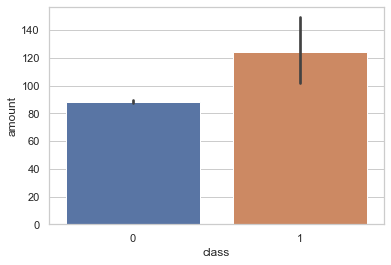

In [50]:
#class vs amount
sns.set(style = "whitegrid")
sns.barplot(x = batsy["class"], y = batsy["amount"])
plt.show()

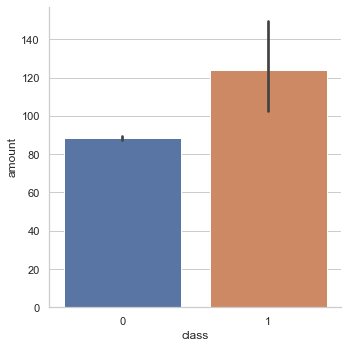

In [51]:
sns.catplot(x = "class", y = "amount", kind = "bar", data = batsy)
plt.show()

In [19]:
batsy.duplicated().value_counts()

False    283725
True       1081
dtype: int64

In [20]:
len(batsy)

284806

In [21]:
#dropping the duplicate values
batsy.drop_duplicates(inplace = True)
print(len(batsy))

283725


In [22]:
print(batsy["time"].min())
print(batsy["time"].max())

0.0
172792.0


In [23]:
batsy.reset_index(drop = True, inplace = True)

In [24]:
#converting the time (in seconds) variable into time (hourly) variable, continuing for 2 days 
#ranging from 0 hour - 48 hours.
batsy["hours_round"] = round(batsy["time"]/(60*60))

In [25]:
batsy.reset_index(drop = True, inplace = True)

In [26]:
batsy.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,class,hours_round
283720,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,48.0
283721,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,48.0
283722,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,48.0
283723,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,48.0
283724,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,48.0


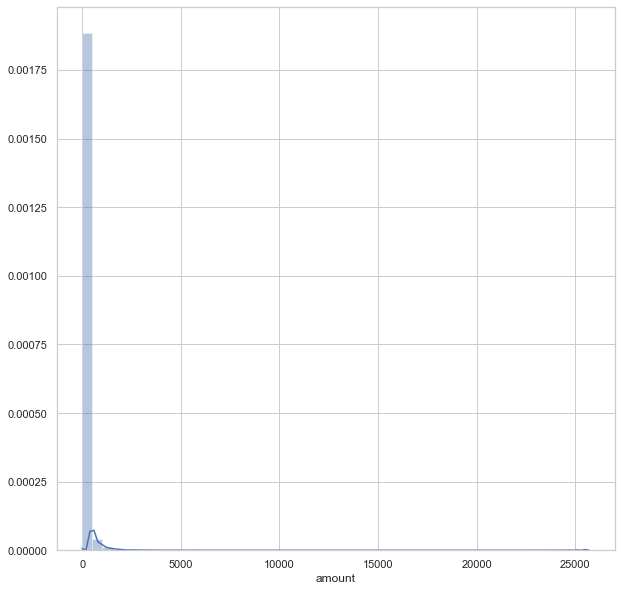

In [52]:
#frequency vs amount
plt.figure(figsize = (10,10))
sns.distplot(batsy["amount"])
plt.show()

In [30]:
batsy.index.max()

283713

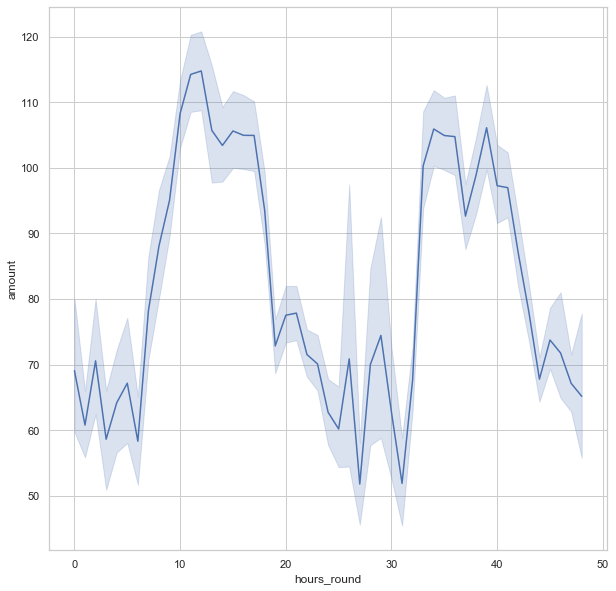

In [53]:
#time(hours) vs amount
plt.figure(figsize = (10,10))
sns.lineplot(batsy["hours_round"], batsy["amount"])
plt.show()

In [236]:
batsy["amount"].quantile(0.99)

1016.5358999999974

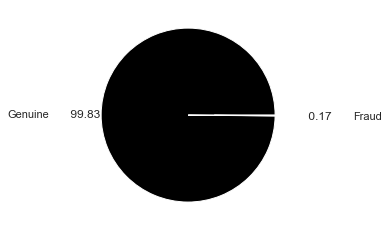

In [41]:
#pie chart of fraud and genuine transactions
labels = ["Genuine","Fraud"]
colors = ["black", "white"]
explode = [0, 0.3]
plt.pie(batsy["class"].value_counts(), labels = labels, colors = colors, autopct = "% .2f", 
        pctdistance = 1.2, labeldistance = 1.6, explode = explode)
plt.show()

In [238]:
batsy["amount"].value_counts()

1.00       13566
1.98        6044
0.89        4871
9.99        4738
15.00       3280
           ...  
254.07         1
365.03         1
362.97         1
241.71         1
1080.06        1
Name: amount, Length: 32755, dtype: int64

In [20]:
list(batsy["amount"].value_counts())[1]

6044

In [239]:
pd.Series(batsy['amount'].value_counts())[0:]

0.00       1808
11.50      1739
4.49       1579
5.00       1564
0.77       1443
           ... 
254.07        1
365.03        1
362.97        1
241.71        1
1080.06       1
Name: amount, Length: 32743, dtype: int64

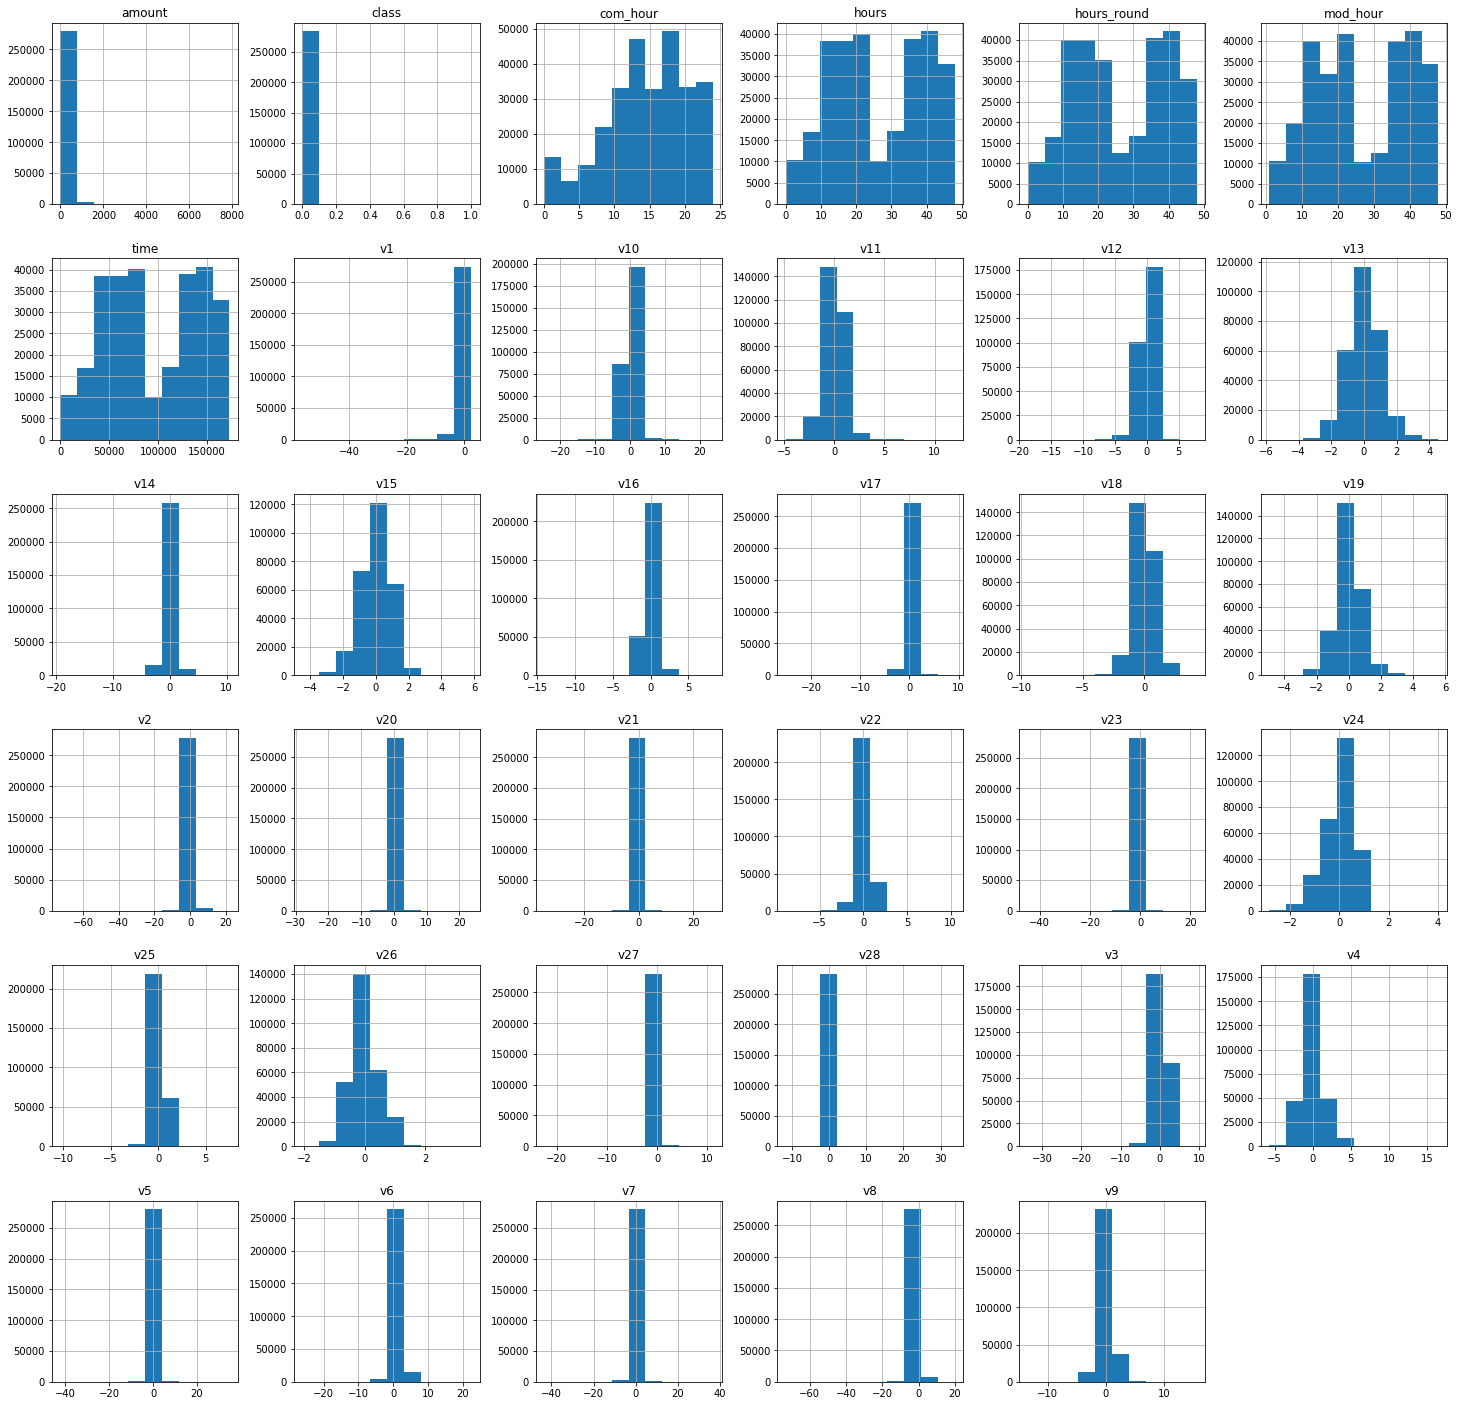

In [178]:
batsy.hist(figsize = (25, 25))
plt.show()

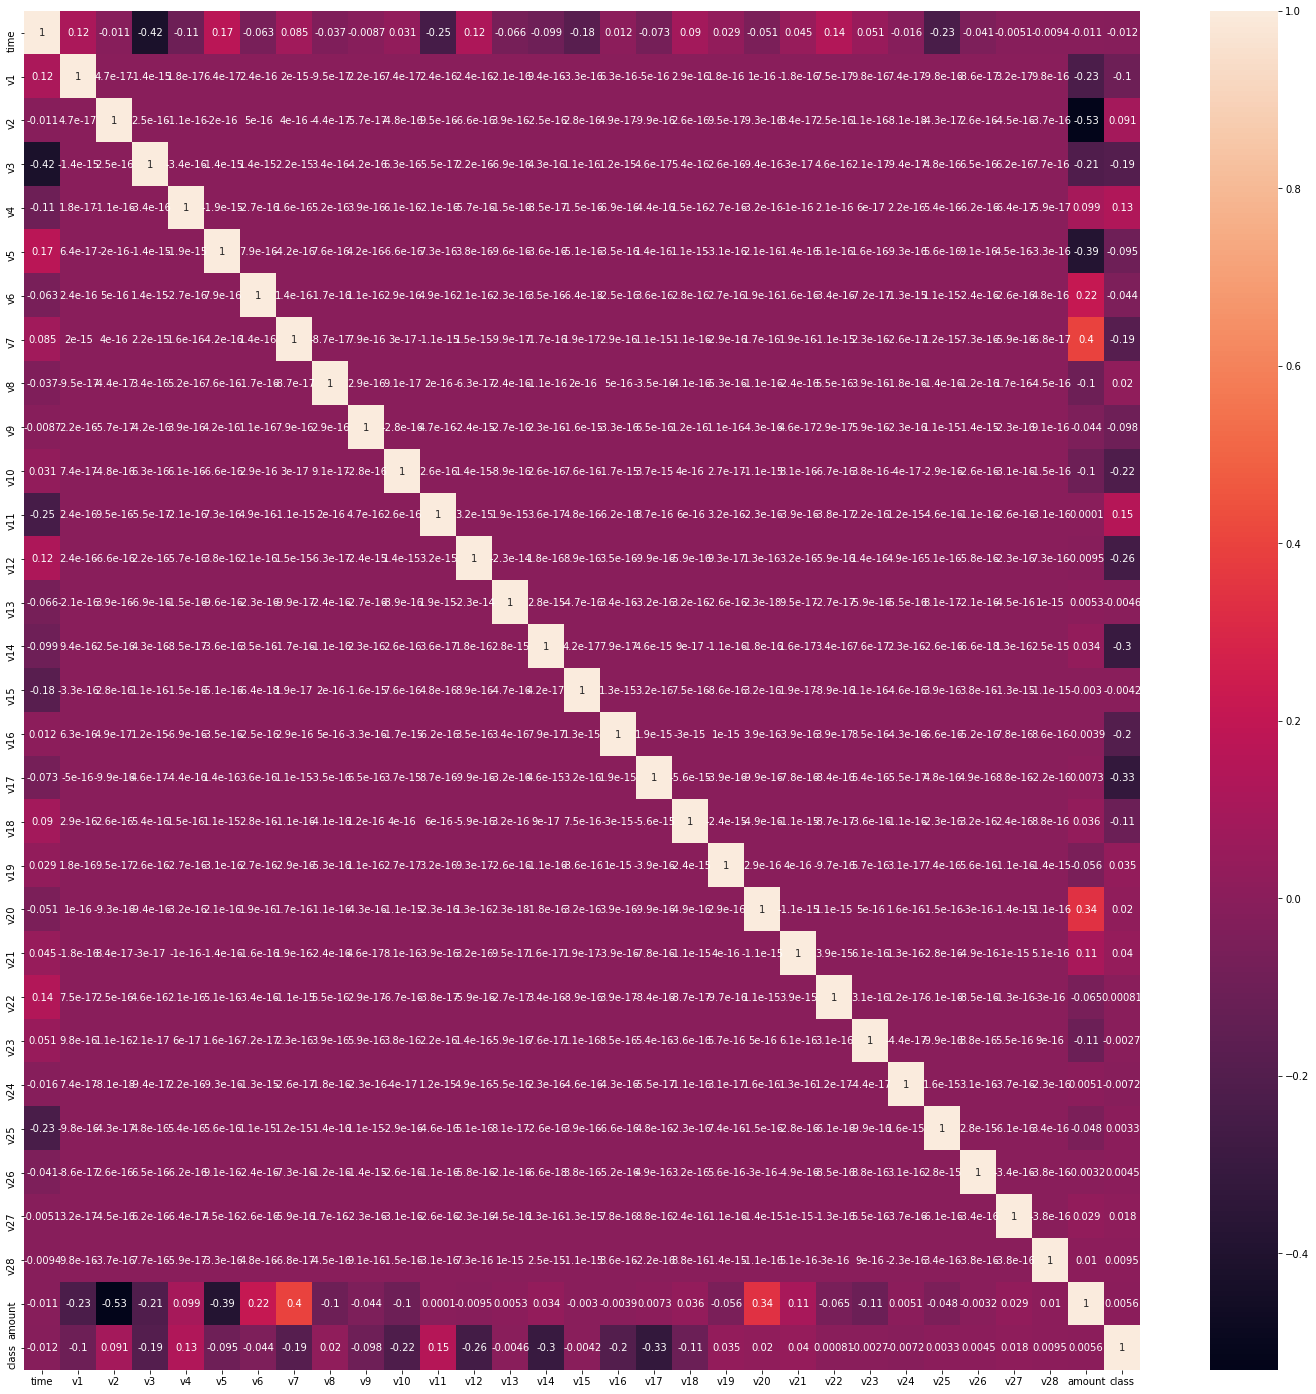

In [5]:
plt.figure(figsize = (25,25))
sns.heatmap(batsy.corr(), annot = True)
plt.show()

In [44]:
#batsy["mod_hour"] = batsy["hours"].astype(int)+1

In [42]:
#converting the hour_round to the time in hours per day (day 1: 0 - 24hrs, day 2: 0 - 24hrs)
batsy["com_hour"] = np.round(batsy["hours_round"]%24).astype(int)

In [36]:
batsy.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hours_round,com_hour
283709,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,48.0,0
283710,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,48.0,0
283711,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,48.0,0
283712,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,48.0,0
283713,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,48.0,0


In [43]:
#to compare the transactions on timely basis
print(batsy[["amount", "class", "com_hour"]].groupby(["com_hour", "class"]).mean())

                    amount
com_hour class            
0        0       64.551488
         1      236.300000
1        0       60.480872
         1       67.997778
2        0       70.900499
         1       58.085455
3        0       54.915139
         1      123.588235
4        0       67.458152
         1       16.657222
5        0       70.015685
         1      156.887059
6        0       60.369499
         1       21.458889
7        0       62.834429
         1      107.285294
8        0       77.709362
         1      103.806667
9        0       97.608418
         1      206.748000
10       0      107.047466
         1      149.718421
11       0      109.657872
         1       88.309687
12       0      109.751521
         1      159.632424
13       0       98.975739
         1      160.183500
14       0      101.112889
         1      132.447273
15       0      105.834821
         1      144.208846
16       0      100.808602
         1      146.459643
17       0      100.725075
 

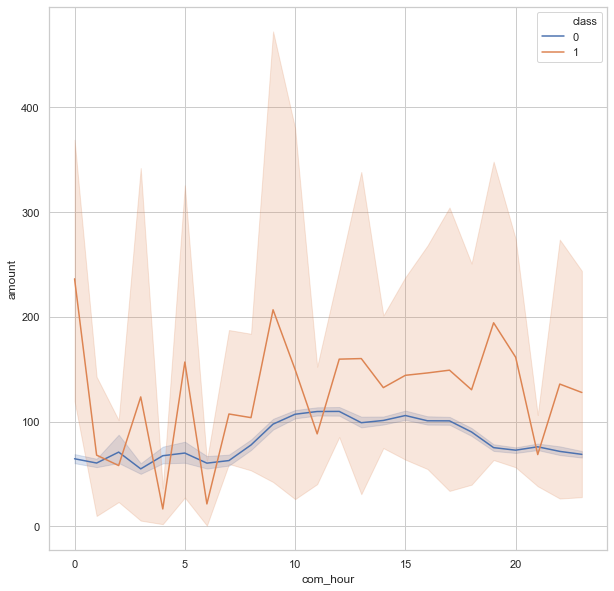

In [54]:
#hourly distribution of transactional amount with respect to class variable
plt.figure(figsize = (10,10))
sns.lineplot(batsy["com_hour"], batsy["amount"], hue = batsy["class"], size_norm = True)
plt.show()

In [39]:
step = int(max(batsy["amount"])/10)
step

787

In [45]:
#making new column, includes binned amount column
bins = range(0, 8000, 800)

batsy["bin_cols"] = pd.cut(batsy["amount"], bins = bins)
batsy["bin_cols"].value_counts()

(0, 800]        277456
(800, 1600]       3296
(1600, 2400]       683
(2400, 3200]       241
(3200, 4000]       122
(4000, 4800]        57
(4800, 5600]        20
(5600, 6400]        13
(6400, 7200]         9
Name: bin_cols, dtype: int64

<Figure size 1080x1080 with 0 Axes>

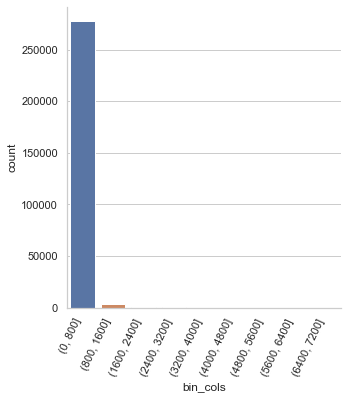

In [55]:
#plotting the new column
plt.figure(figsize = (15,15))
sns.catplot(x = "bin_cols", kind = "count", data = batsy)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

In [47]:
batsy["amount"].values.reshape(-1, 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [48]:
#scaling the required variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
batsy["amount_scaled"] = ss.fit_transform(batsy["amount"].values.reshape(-1, 1))
batsy.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v25,v26,v27,v28,amount,class,hours_round,com_hour,bin_cols,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0,"(0, 800]",0.245517
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0,"(0, 800]",-0.343996
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0,"(0, 800]",1.164472
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0,"(0, 800]",0.140718
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0,"(0, 800]",-0.073975


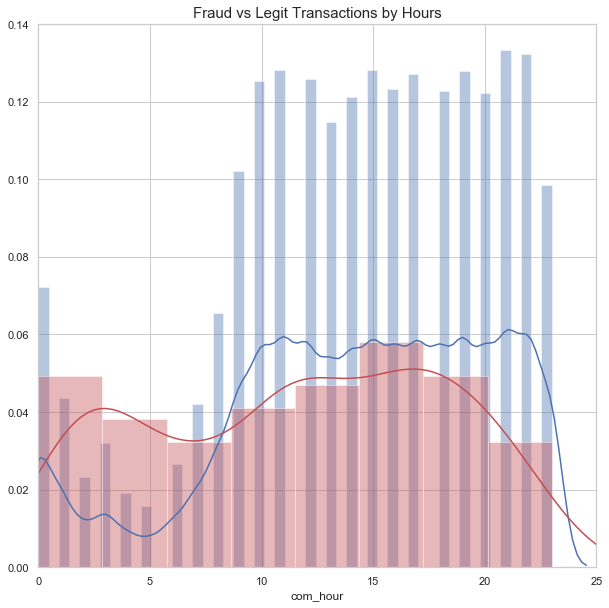

In [56]:
plt.figure(figsize=(10,10))

sns.distplot(batsy[batsy["class"] == 0]["com_hour"], color='b') # Genuine - green

sns.distplot(batsy[batsy["class"] == 1]["com_hour"], color='r') # Fraudulent - Red

plt.title("Fraud vs Legit Transactions by Hours", fontsize=15)
plt.xlim([0,25])
plt.show()

In [58]:
legit_hour_count = batsy[batsy["class"] == 0].groupby(["com_hour"] , 
                   as_index = False)["com_hour"].size().reset_index(name = "count")
legit_hour_count

,com_hour,count
0,0,9406
1,1,5687
2,2,3045
3,3,4174
4,4,2500
5,5,2074
6,6,3453
7,7,5491
8,8,8543
9,9,13313


In [59]:
fraud_hour_count = batsy[batsy["class"] == 1].groupby(["com_hour"] , 
                                                      as_index = False)["com_hour"].size().reset_index(name = "count")
fraud_hour_count

,com_hour,count
0,0,14
1,1,9
2,2,44
3,3,17
4,4,18
5,5,17
6,6,9
7,7,17
8,8,18
9,9,5


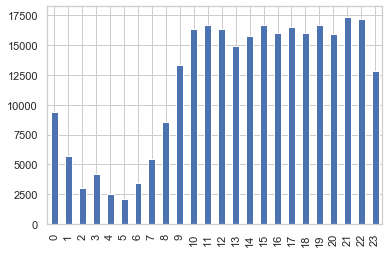

In [60]:
#legit transactions
legit_hour_count["count"].plot(kind = "bar")
plt.show()

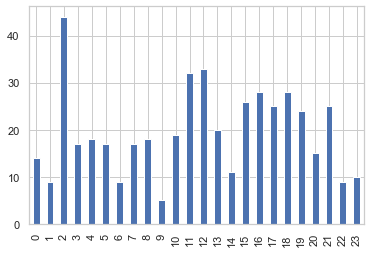

In [61]:
#fraud transactions
fraud_hour_count["count"].plot(kind = "bar")
plt.show()

In [65]:
class_comp = pd.DataFrame([batsy[batsy["class"] == 0]["amount"].describe().to_dict(), 
                           batsy[batsy["class"] == 1]["amount"].describe().to_dict()])

class_comp = class_comp.T
class_comp.columns = ["Legit", "Fraud"]
class_comp

,Legit,Fraud
count,283252.000000,473.000000
mean,88.368306,123.871860
std,249.217597,260.211041
min,0.000000,0.000000
25%,5.670000,1.000000
50%,22.000000,9.820000
75%,77.460000,105.890000
max,25691.160000,2125.870000


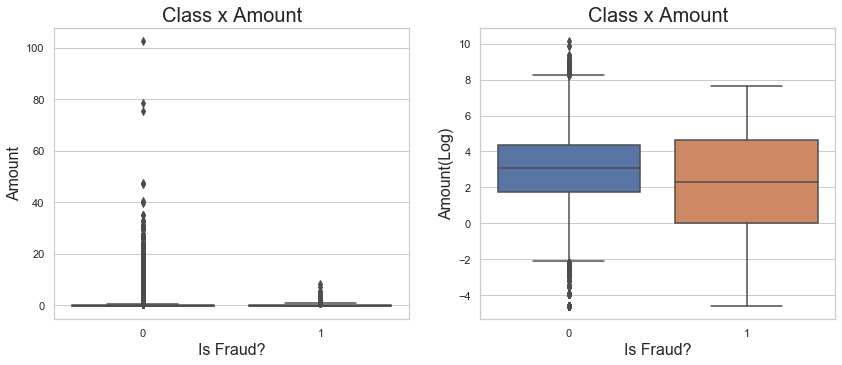

In [66]:
#Feature engineering for a better visualization of the values
batsy["amount_log"] = np.log(batsy.amount + 0.01)

plt.figure(figsize=(14,6))

plt.subplot(121)
ax = sns.boxplot(x = "class", y = "amount_scaled", data = batsy)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x = "class", y = "amount_log", data = batsy)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [47]:
batsy.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v26,v27,v28,amount,class,hours_round,com_hour,bin_cols,amount_scaled,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0.0,0,"(0, 800]",0.264187,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0.0,0,"(0, 800]",-0.365034,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0,"(0, 800]",1.245040,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0.0,0,"(0, 800]",0.152329,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0.0,0,"(0, 800]",-0.076825,4.248495


## Modeling

In [68]:
y = batsy["class"].values

x = batsy.drop(columns = ["time", "amount", "class", "hours_round", "com_hour", "bin_cols", "amount_log"])

### Linear Regression

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(accuracy_score(y_pred, y_test)*100)

99.93185930120538


In [71]:
pd.Series(y_pred).value_counts()

0    85033
1       85
dtype: int64

In [72]:
pd.Series(y_test).value_counts()

0    85001
1      117
dtype: int64

In [73]:
104/143

0.7272727272727273

In [74]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[84988,    13],
       [   45,    72]], dtype=int64)

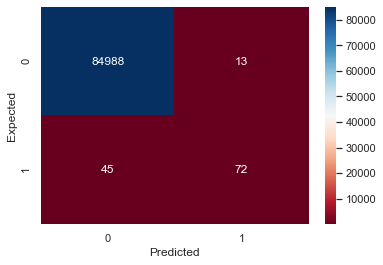

In [81]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdBu", fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [88]:
87/143

0.6083916083916084

In [58]:
#ROC-AUC score of the model
roc_auc_score(y_test, y_pred)

0.8040957712437728

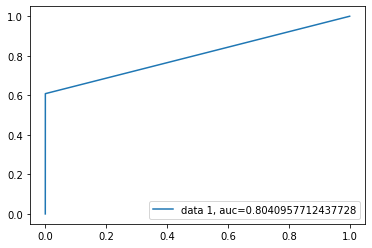

In [59]:
#AUC curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)
plt.show()

### Undersampling

Original dataset shape Counter({0: 283252, 1: 473})
Resampled dataset shape Counter({0: 473, 1: 473})
Accuracy after RUS = 0.9436619718309859


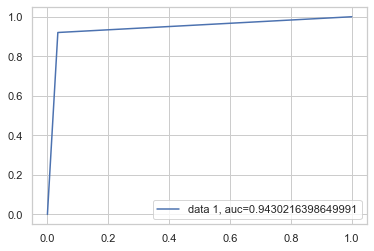

In [85]:
print("Original dataset shape %s" % Counter(y))

rus = RandomUnderSampler(random_state = 0)

x_rus, y_rus = rus.fit_resample(x, y)
print("Resampled dataset shape %s" % Counter(y_rus))

x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print("Accuracy after RUS = %s" % accuracy_score(y_pred , y_test))

y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Oversampling

Original dataset shape Counter({0: 283252, 1: 473})
Resampled dataset shape Counter({0: 283252, 1: 283252})
Accuracy after ROS = 0.9498211259649784


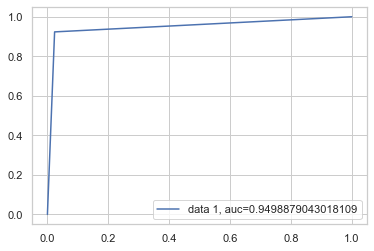

In [89]:
print("Original dataset shape %s" % Counter(y))

ros = RandomOverSampler(random_state = 0)

x_ros, y_ros = ros.fit_resample(x, y)
print("Resampled dataset shape %s" % Counter(y_ros))

x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print("Accuracy after ROS =", accuracy_score(y_pred , y_test))

y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### SMOTE

Original dataset shape Counter({0: 283252, 1: 473})
Resampled dataset shape Counter({0: 283252, 1: 283252})
Accuracy after SMOTE = 0.9446549614008661


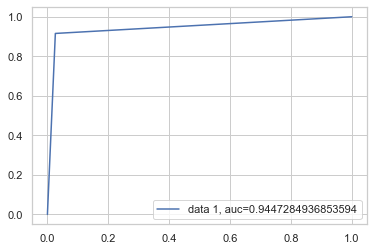

In [90]:
print("Original dataset shape %s" % Counter(y))

syn_sam = SMOTE(random_state = 0)

x_sm, y_sm = syn_sam.fit_resample(x, y)
print("Resampled dataset shape %s" % Counter(y_sm))

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
x
y_pred = logreg.predict(x_test)
print("Accuracy after SMOTE =", accuracy_score(y_pred , y_test))

y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA

In [66]:
x_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(x_ros)

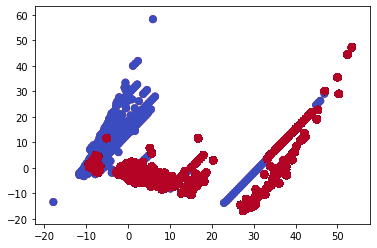

In [67]:
#f,ax = plt.figure(figsize=(24,6))

plt.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c = (y_ros == 0), cmap = "coolwarm", label = "Legit", linewidths=2)
plt.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c = (y_ros == 1), cmap = "coolwarm", label = "Fraud", linewidths=2)
plt.show()

In [68]:
x_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(x_rus)

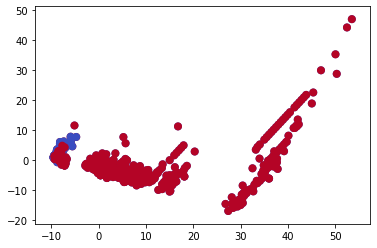

In [69]:
plt.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c = (y_rus == 0), cmap = "coolwarm", label = "Legit", linewidths=2)
plt.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c = (y_rus == 1), cmap = "coolwarm", label = "Fraud", linewidths=2)
plt.show()

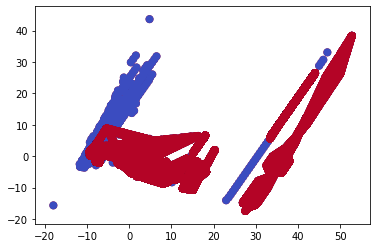

In [70]:
x_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(x_sm)

plt.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c = (y_sm == 0), cmap = "coolwarm", label = "Legit", linewidths=2)
plt.scatter(x_reduced_pca[:,0], x_reduced_pca[:,1], c = (y_sm == 1), cmap = "coolwarm", label = "Fraud", linewidths=2)
plt.show()

### Decision Tree classifier

DTC Accuracy Score = 0.9991305880279622


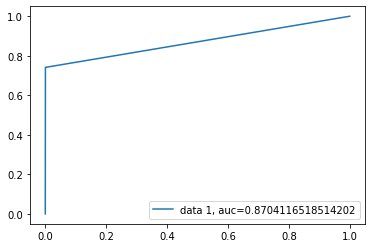

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

print("DTC Accuracy Score =", accuracy_score(y_pred , y_test))

y_pred_proba = dtc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr, label = "data 1, auc="+str(auc))
plt.legend(loc = 4)
plt.show()

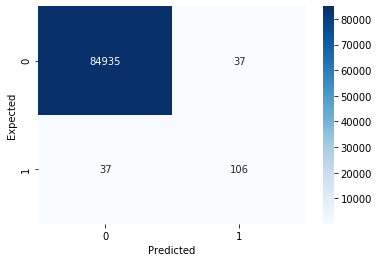

In [74]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

DTC Accuracy after RUS = 0.9119718309859155


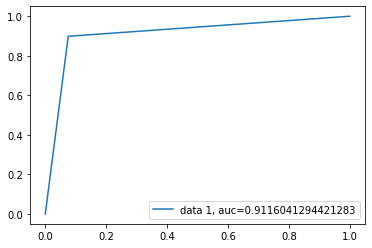

In [75]:
#Undersampling with DTC
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
print("DTC Accuracy after RUS = %s" % accuracy_score(y_pred , y_test))

y_pred_proba = dtc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

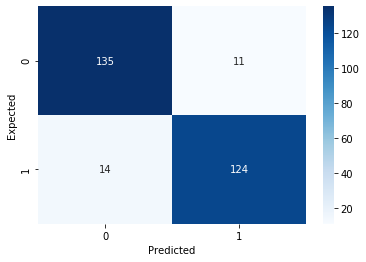

In [76]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

DTC Accuracy after ROS = 0.9997293241931213


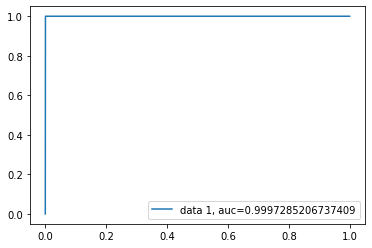

In [77]:
#Oversampling with DTC (giving good result)
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
print("DTC Accuracy after ROS =", accuracy_score(y_pred , y_test))

y_pred_proba = dtc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

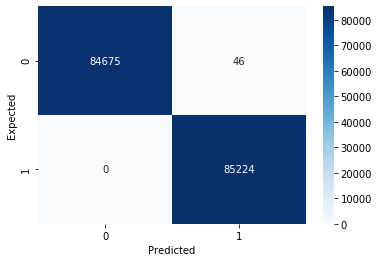

In [78]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

DTC Accuracy after SMOTE = 0.9980052369884375


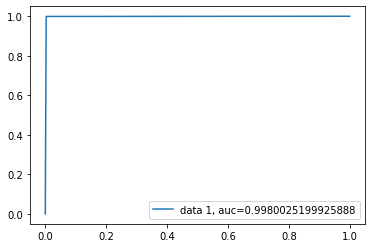

In [79]:
#SMOTE with DTC
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 0)
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
print("DTC Accuracy after SMOTE =", accuracy_score(y_pred , y_test))

y_pred_proba = dtc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

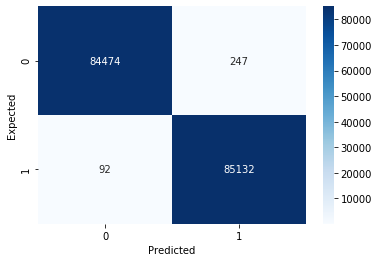

In [80]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Random Forest classifier

RFC Accuracy = 0.9995770428244141


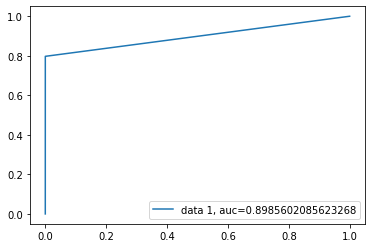

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print("RFC Accuracy =", accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

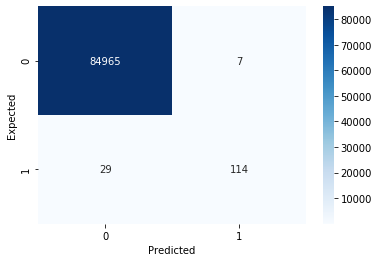

In [83]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

RFC Accuracy after RUS = 0.9401408450704225


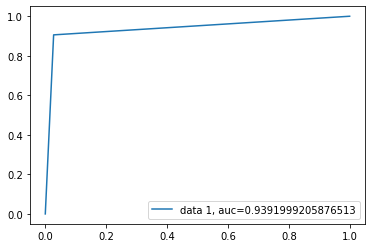

In [84]:
#Undersampling with RFC
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print("RFC Accuracy after RUS = %s" % accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

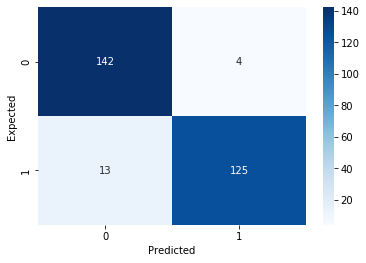

In [85]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

RFC Accuracy after ROS = 0.999935273176616


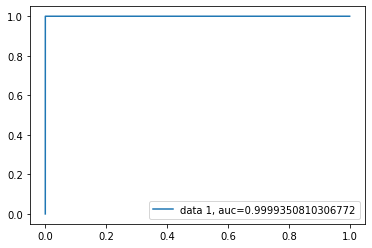

In [86]:
#Oversampling with RFC ~~~~(Best model)~~~~
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print("RFC Accuracy after ROS =", accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

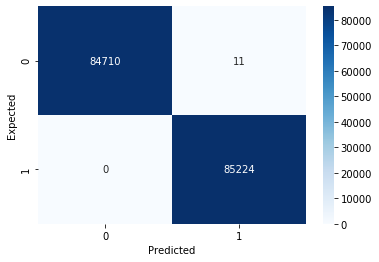

In [87]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

RFC Accuracy after SMOTE = 0.9998411250698755


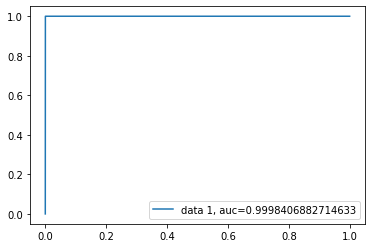

In [88]:
#SMOTE with RFC (Good model)
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 0)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
print("RFC Accuracy after SMOTE =", accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

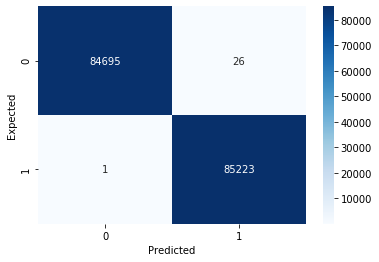

In [89]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### KNN classifier

KNC Accuracy = 0.9995065499618163


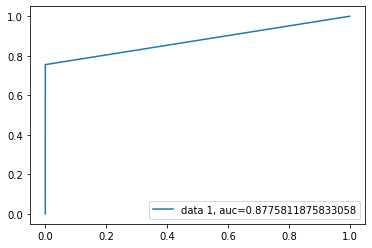

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

y_pred = knc.predict(x_test)
print("KNC Accuracy =", accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

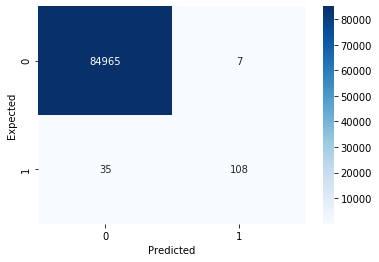

In [91]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

KNC Accuracy after RUS = 0.9401408450704225


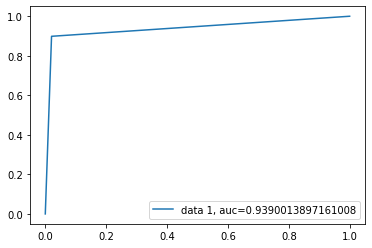

In [92]:
#Undersampling with KNN
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

y_pred = knc.predict(x_test)
print("KNC Accuracy after RUS = %s" % accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

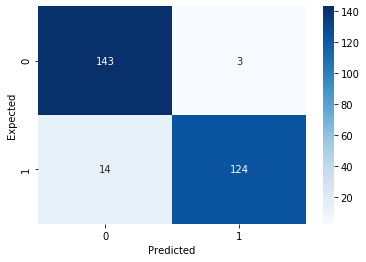

In [93]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

KNC Accuracy after ROS = 0.999593986289682


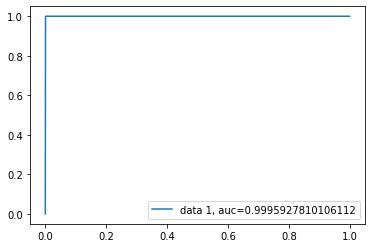

In [95]:
#Oversampling with KNN (good model)
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

y_pred = knc.predict(x_test)
print("KNC Accuracy after ROS =", accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

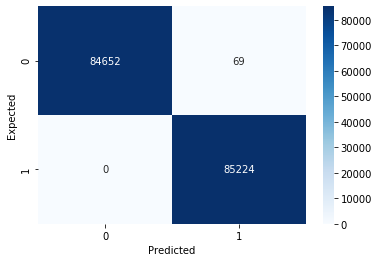

In [96]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

KNC Accuracy after SMOTE = 0.9988996440024714


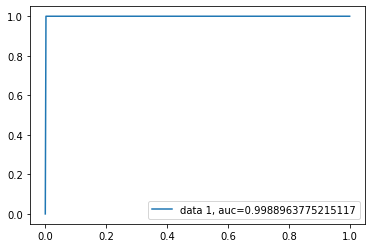

In [97]:
#SMOTE with KNN
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 0)
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

y_pred = knc.predict(x_test)
print("KNC Accuracy after SMOTE =", accuracy_score(y_pred , y_test))

y_pred_proba = knc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

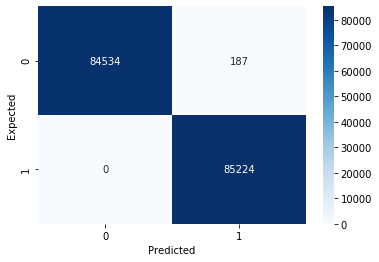

In [98]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Support Vector classifier

SVC Accuracy = 0.9994595737681806


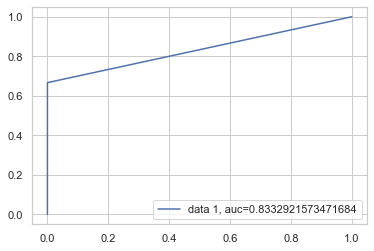

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
sup_vec = SVC(probability = True)
sup_vec.fit(x_train, y_train)

y_pred = sup_vec.predict(x_test)
print("SVC Accuracy =", accuracy_score(y_pred , y_test))

y_pred_proba = sup_vec.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

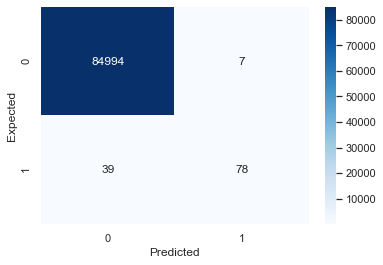

In [83]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

SVC Accuracy after RUS = 0.9330985915492958


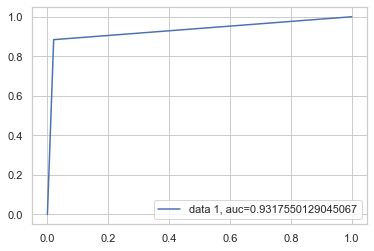

In [86]:
#Undersampling with SVC
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
svc = SVC(probability = True)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print("SVC Accuracy after RUS = %s" % accuracy_score(y_pred , y_test))

y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

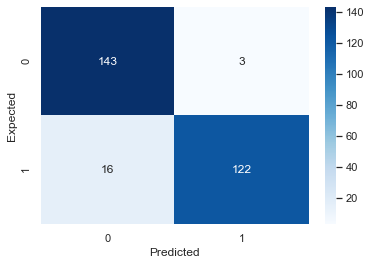

In [87]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#Oversampling with SVC
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)
svc = SVC(probability = True)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print("SVC Accuracy after ROS =", accuracy_score(y_pred , y_test))

y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

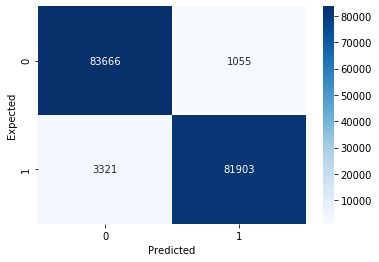

In [105]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
#SMOTE

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 0)
svc = SVC(probability = True)
svc.fit(x_sm, y_sm)

y_pred = svc.pred(x_test)
print("SVC Accuracy after SMOTE =", accuracy_score(y_pred, y_test))

y_pred_proba = svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "data 1, auc ="+str(auc))
plt.legend(loc = 4)
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
# #def kfolds(n_folds):
    
#     acc_avg = []
#     acc_std = []
#     roc_auc_avg = []
#     roc_auc_std = []
    
#     for i in n_folds:
#         n_folds = [i]
        
#         kf = KFold(n_folds, shuffle = True, random_state = 24)
#         accuracy = cross_val_score(logreg, train_scaled.values, y, scoring = "accuracy", cv = kf)
#         RA_score = cross_val_score(logreg, train_scaled.values, y, scoring = "roc_auc", cv = kf)
        
#         acc_avg.append(accuracy.mean())
#         acc_std.append(accuracy.std())
#         roc_auc_avg.append(RA_score.mean())
#         roc_auc_std.append(RA_score.std())
        
#     return acc_avg, acc_std, roc_auc_avg, roc_auc_std

## End conclusions -

- After doing all the analysis and painting the picture with graphs, it came to the notice that fraud transactions happen majorly during **0-hour (12:00 am) to 10-hours (10:00 am)**. The peak of which is attained between **2-hours (2:00 am) to 3-hours (3:00 am)**. 


- Because of the high class imbalance in our target variable, re-sampling techniques (undersampling, oversampling and SMOTE) were used in combination with different ML algorithms - **Logistic Regression, Decision Trees, Random Forest, KNN classifier and SVC**.


- Classifiers that gave good results were: 

    1> **Oversampling with Decision Tree classifier**, 
    
    2> **Oversampling with Random Forest classifier**,
    
    3> **SMOTE with  Random Forest classifier**, 
    
    4> **Oversampling with KNN classifier**, and 
    
    5> **SMOTE with KNN classifier**


- Although, the best classifier to use for our use case among the above listed classifiers is: **Oversampling with RFC**, because first of all, its showing **99.99%** in both the metrics we're using, accuracy score and ROC-AUC score. Second of all, the confusion matrix of this classifier reported **0 False Negative** and only **11 False Positives**, where False Positives are not much of an issue in our case but the contrary, is. 